In [1]:
import numpy as np

In [2]:
data = np.loadtxt("ridgetrain.txt")

# Assuming the first column is X and the second column is Y
X = data[:, 0].reshape(-1, )
Y = data[:, 1]

In [3]:
Y.shape

(250,)

## (1) Kernel Ridge Regression

In [4]:
# making the kernelized matrix
N = len(X)
gamma = 0.1

kernel_matrix = np.zeros((N, N))

for i in range(N):
    for j in range(N):
      
        distance = np.linalg.norm(X[i] - X[j])

        kernel_matrix[i, j] = np.exp(-gamma * distance**2)

In [5]:
kernel_matrix.shape

(250, 250)

In [8]:
Y.shape

(250,)

In [19]:
# Ridge Regression 

lamda = 0.1

W_l = kernel_matrix + lamda*np.eye(N,N) #need the inverse of this

W_l = np.linalg.inv(W_l)

alpha = np.matmul(W_l,Y)

# W_r = np.matmul(kernel_matrix.T,Y)

# W = np.matmul(W_l,W_r)

print("Shape of Weights: ",alpha.shape)

Shape of Weights:  (250,)


In [11]:
test_data = np.loadtxt("ridgetest.txt")

# Assuming the first column is X and the second column is Y
X_test = test_data[:, 0].reshape(-1, )
Y_test = test_data[:, 1]

In [13]:
N = len(X_test)
X_test.shape

(250,)

In [20]:
# we have got the weights, time to make the prediction

Y_predicted = np.zeros((N,))

for i in range(N):
    # got the x*
    # y_ be the predicted values against x*
    y_ = 0
    for j in range(N):

        distance = np.linalg.norm(X_test[i] - X[j])

        kernel = np.exp(-gamma * distance**2)

        y_ = y_ + alpha[j]*kernel

    Y_predicted[i] = y_


print("Shape of Y_pred is ",Y_predicted.shape)


Shape of Y_pred is  (250,)


In [15]:
from sklearn.metrics import mean_squared_error

def rmse(true,pred):
    mse = mean_squared_error(true,pred)

    # Calculate root mean squared error
    rmse = np.sqrt(mse)

    return rmse

In [21]:
print("RMSE for lamda = 0.1 is ",rmse(Y_test,Y_predicted))

RMSE for lamda = 0.1 is  0.03257767029357041


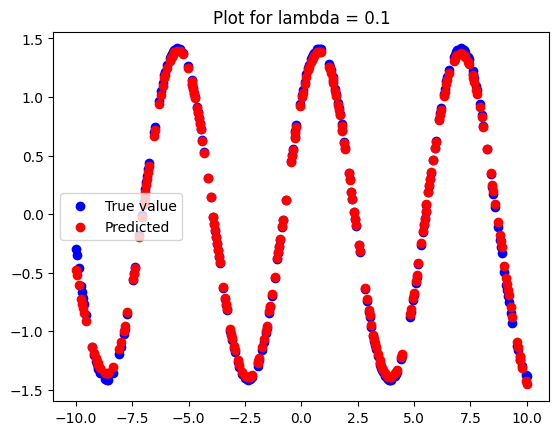

In [22]:
import matplotlib.pyplot as plt

plt.scatter(x = X_test,y = Y_test,color = 'blue',label = "True value")
plt.scatter(x = X_test,y = Y_predicted,color = 'red',label = "Predicted")
plt.title(f"Plot for lambda = {lamda}")
plt.legend()
plt.show()

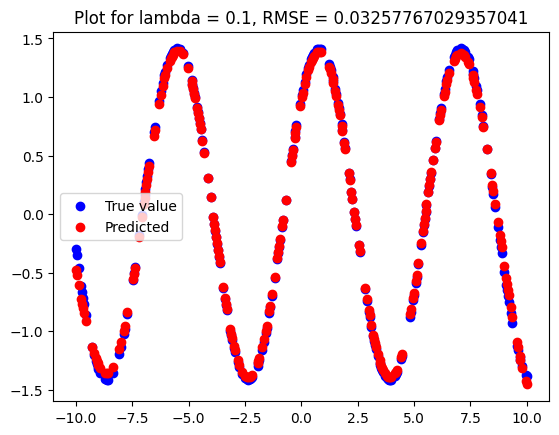

Lamda = 0.1 - RMSE = 0.03257767029357041


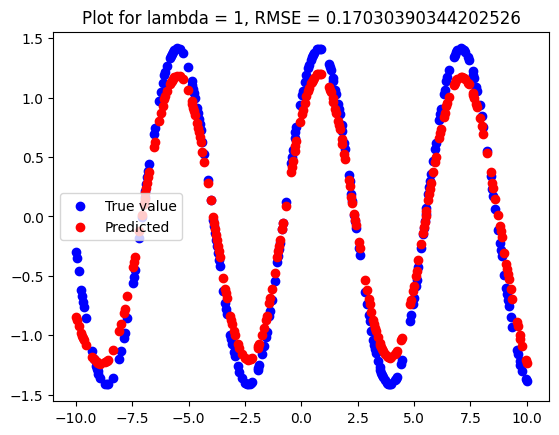

Lamda = 1 - RMSE = 0.17030390344202526


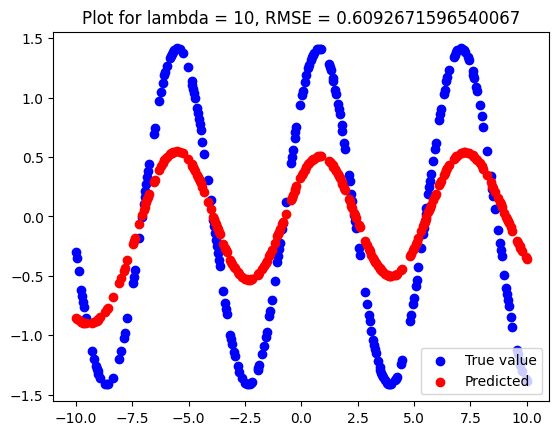

Lamda = 10 - RMSE = 0.6092671596540067


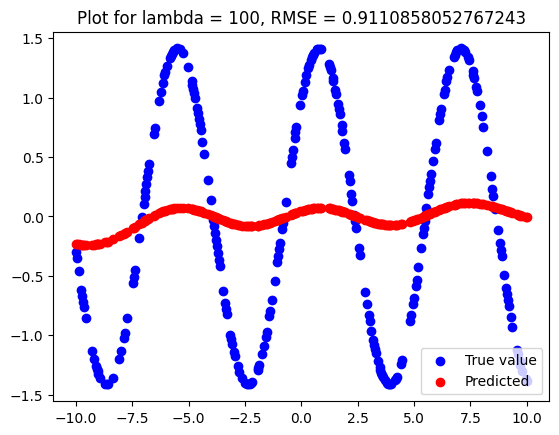

Lamda = 100 - RMSE = 0.9110858052767243


In [24]:
lamda_list = [0.1,1,10,100]

for lamda in lamda_list:
    
    # getting the weights
    W_l = kernel_matrix + lamda*np.eye(N,N) #need the inverse of this

    W_l = np.linalg.inv(W_l)

    alpha = np.matmul(W_l,Y)

    # making the predictions
    Y_predicted = np.zeros((N,))

    for i in range(N):
        # got the x*
        # y_ be the predicted values against x*
        y_ = 0
        for j in range(N):

            distance = np.linalg.norm(X_test[i] - X[j])

            kernel = np.exp(-gamma * distance**2)

            y_ = y_ + alpha[j]*kernel

        Y_predicted[i] = y_

    score = rmse(Y_test,Y_predicted)

    # making the plot
    plt.scatter(x = X_test,y = Y_test,color = 'blue',label = "True value")
    plt.scatter(x = X_test,y = Y_predicted,color = 'red',label = "Predicted")
    plt.title(f"Plot for lambda = {lamda}, RMSE = {score}")
    plt.legend()
    plt.show()

    print(f"Lamda = {lamda} - RMSE = {score}")

## (2) Landmark Ridge Regression

In [25]:
# creating the landmark points

L = 2

landmarks = np.random.choice(X, size=L, replace=False)

landmarks.shape

(2,)

In [26]:
# making the kernelized features using these landmarks

gamma = 0.1

kernel_matrix = np.zeros((N,L))

for i in range(N):
    for j in range(L):

        distance = np.linalg.norm(X[i]-landmarks[j])

        kernel_matrix[i,j] = np.exp(-gamma * distance**2)

In [27]:
kernel_matrix.shape

(250, 2)

In [28]:
# Ridge Regression 

lamda = 0.1

W_l = np.matmul(kernel_matrix.T,kernel_matrix) + lamda*np.eye(L,L) #need the inverse of this

W_l = np.linalg.inv(W_l)

W_r = np.matmul(kernel_matrix.T,Y)

W = np.matmul(W_l,W_r)

print("Shape of Weights: ",W.shape)

Shape of Weights:  (2,)


In [29]:
# kernel matrix of the test input

gamma = 0.1

k_test = np.zeros((N, L))

for i in range(N):
    for j in range(L):
      
        distance = np.linalg.norm(X_test[i] - landmarks[j])

        k_test[i, j] = np.exp(-gamma * distance**2)

In [30]:
k_test.shape

(250, 2)

In [31]:
Y_predicted = np.matmul(k_test,W)
Y_predicted.shape

(250,)

In [32]:
print(rmse(Y_test,Y_predicted))

0.9681124608360894


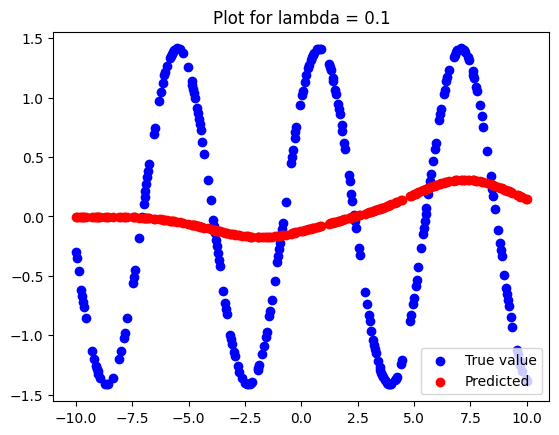

In [33]:
plt.scatter(x = X_test,y = Y_test,color = 'blue',label = "True value")
plt.scatter(x = X_test,y = Y_predicted,color = 'red',label = "Predicted")
plt.title(f"Plot for lambda = {lamda}")
plt.legend()
plt.show()

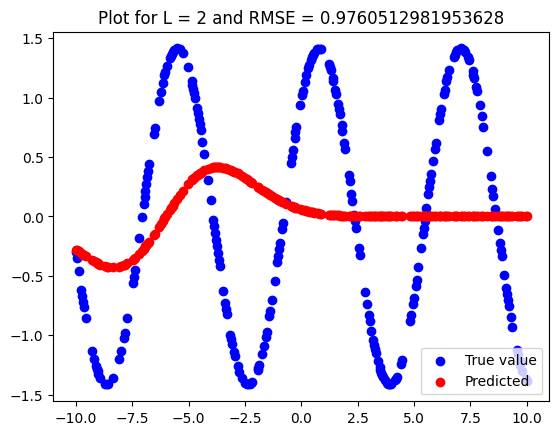

L = 2 and RMSE = 0.9760512981953628


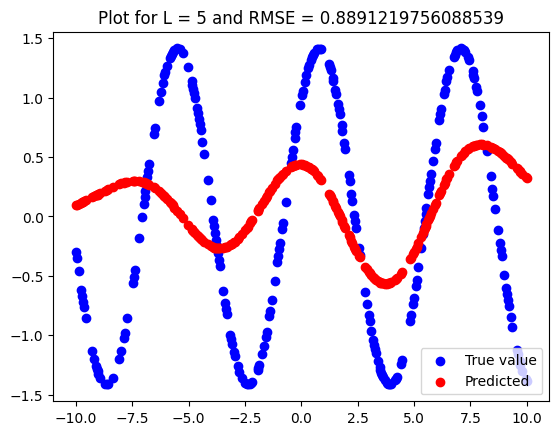

L = 5 and RMSE = 0.8891219756088539


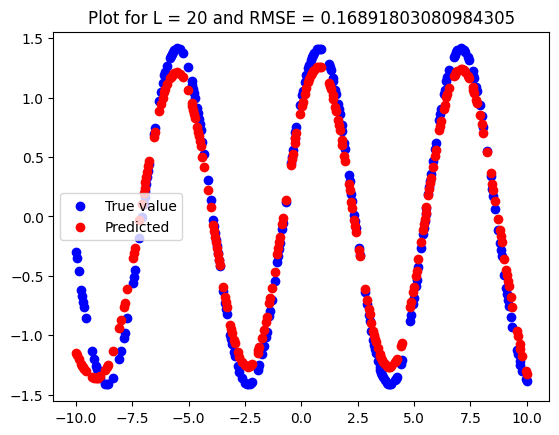

L = 20 and RMSE = 0.16891803080984305


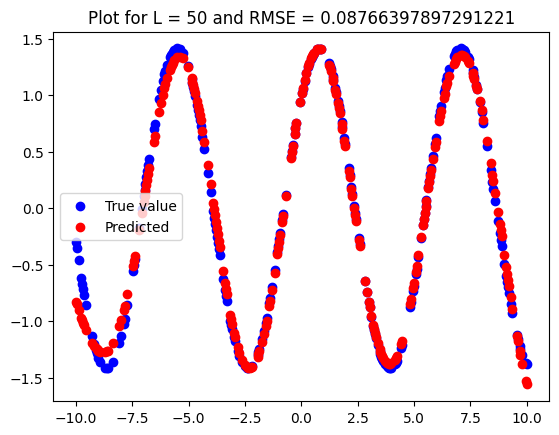

L = 50 and RMSE = 0.08766397897291221


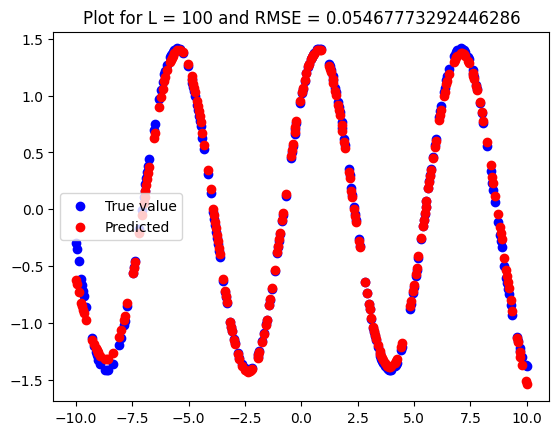

L = 100 and RMSE = 0.05467773292446286


In [34]:
L_list = [2,5,20,50, 100]

for L in L_list:
    landmarks = np.random.choice(X, size=L, replace=False)

    # making the kernelized features using these landmarks

    gamma = 0.1

    kernel_matrix = np.zeros((N,L))

    for i in range(N):
        for j in range(L):

            distance = np.linalg.norm(X[i]-landmarks[j])

            kernel_matrix[i,j] = np.exp(-gamma * distance**2)

    # Ridge Regression 

    lamda = 0.1

    W_l = np.matmul(kernel_matrix.T,kernel_matrix) + lamda*np.eye(L,L) #need the inverse of this

    W_l = np.linalg.inv(W_l)

    W_r = np.matmul(kernel_matrix.T,Y)

    W = np.matmul(W_l,W_r)

    # kernel matrix of the test input

    gamma = 0.1

    k_test = np.zeros((N, L))

    for i in range(N):
        for j in range(L):
        
            distance = np.linalg.norm(X_test[i] - landmarks[j])

            k_test[i, j] = np.exp(-gamma * distance**2)

    Y_predicted = np.matmul(k_test,W)

    score = rmse(Y_test,Y_predicted)

    plt.scatter(x = X_test,y = Y_test,color = 'blue',label = "True value")
    plt.scatter(x = X_test,y = Y_predicted,color = 'red',label = "Predicted")
    plt.title(f"Plot for L = {L} and RMSE = {score}")
    plt.legend()
    plt.show()
    print(f"L = {L} and RMSE = {score}")